# Aggregate data

In [1]:
from csv import reader
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline  

data = {}
dataset_path = '../data/2015/'

missing = 0
# Load Accidents.csv
i = 0
with open(dataset_path+'Accidents.csv', 'rb') as csvfile:
    for line in reader(csvfile, delimiter=','):
        if(i==0):
            pass
        else:
            Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_District,Local_Authority_Highway,_1st_Road_Class,_1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,_2nd_Road_Class,_2nd_Road_Number,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location = line
            
            if Longitude and Latitude:
                data[Accident_Index] = {'Location_Easting_OSGR':Location_Easting_OSGR,'Location_Northing_OSGR':Location_Northing_OSGR,'Longitude':Longitude, 'Latitude':Latitude, 'Police_Force':Police_Force, 'Accident_Severity':Accident_Severity, 'Number_of_Vehicles':Number_of_Vehicles, 'Number_of_Casualties':Number_of_Casualties, 'Date':Date, 'Day_of_Week':int(Day_of_Week), 'Time':Time, 'Local_Authority_District':Local_Authority_District, 'Local_Authority_Highway':Local_Authority_Highway, '_1st_Road_Class':_1st_Road_Class, '_1st_Road_Number':_1st_Road_Number, 'Road_Type':Road_Type, 'Speed_limit':Speed_limit, 'Junction_Detail':Junction_Detail, 'Junction_Control':Junction_Control, '_2nd_Road_Class':_2nd_Road_Class, '_2nd_Road_Number':_2nd_Road_Number, 'Pedestrian_Crossing_Human_Control':Pedestrian_Crossing_Human_Control, 'Pedestrian_Crossing_Physical_Facilities':Pedestrian_Crossing_Physical_Facilities, 'Light_Conditions':int(Light_Conditions), 'Weather_Conditions':int(Weather_Conditions), 'Road_Surface_Conditions':Road_Surface_Conditions, 'Special_Conditions_at_Site':Special_Conditions_at_Site, 'Carriageway_Hazards':Carriageway_Hazards, 'Urban_or_Rural_Area':Urban_or_Rural_Area, 'Did_Police_Officer_Attend_Scene_of_Accident':Did_Police_Officer_Attend_Scene_of_Accident, 'LSOA_of_Accident_Location':LSOA_of_Accident_Location}
            else:
                missing += 1
        i+=1

# Load Casualties.csv
i = 0 
with open(dataset_path+'Casualties.csv', 'rb') as csvfile:
    for line in reader(csvfile, delimiter=','):
        if(i==0):
            pass
        else:
            Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile = line
            
            if data.has_key(Accident_Index):
                data[Accident_Index].update({'Vehicle_Reference':Vehicle_Reference, 'Casualty_Reference':Casualty_Reference, 'Casualty_Class':Casualty_Class, 'Sex_of_Casualty':Sex_of_Casualty, 'Age_of_Casualty':Age_of_Casualty, 'Age_Band_of_Casualty':Age_Band_of_Casualty, 'Casualty_Severity':int(Casualty_Severity), 'Pedestrian_Location':Pedestrian_Location, 'Pedestrian_Movement':Pedestrian_Movement, 'Car_Passenger':Car_Passenger, 'Bus_or_Coach_Passenger':Bus_or_Coach_Passenger, 'Pedestrian_Road_Maintenance_Worker':Pedestrian_Road_Maintenance_Worker, 'Casualty_Type':Casualty_Type, 'Casualty_Home_Area_Type':Casualty_Home_Area_Type, 'Casualty_IMD_Decile':Casualty_IMD_Decile})
            else:
                missing += 1
        i+=1

        
# Load Vehicles.csv
i = 0 
with open(dataset_path+'Vehicles.csv', 'rb') as csvfile:
    for line in reader(csvfile, delimiter=','):
        if(i==0):
            pass
        else:
            Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location_Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,_1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity,Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile = line

            if data.has_key(Accident_Index):
                data[Accident_Index].update({'Vehicle_Reference':Vehicle_Reference, 'Vehicle_Type':Vehicle_Type, 'Towing_and_Articulation':Towing_and_Articulation, 'Vehicle_Manoeuvre':Vehicle_Manoeuvre, 'Vehicle_Location_Restricted_Lane':Vehicle_Location_Restricted_Lane, 'Junction_Location':Junction_Location, 'Skidding_and_Overturning':Skidding_and_Overturning, 'Hit_Object_in_Carriageway':Hit_Object_in_Carriageway, 'Vehicle_Leaving_Carriageway':Vehicle_Leaving_Carriageway, 'Hit_Object_off_Carriageway':Hit_Object_off_Carriageway, '_1st_Point_of_Impact':_1st_Point_of_Impact, 'Was_Vehicle_Left_Hand_Drive':Was_Vehicle_Left_Hand_Drive, 'Journey_Purpose_of_Driver':Journey_Purpose_of_Driver, 'Sex_of_Driver':Sex_of_Driver, 'Age_of_Driver':Age_of_Driver, 'Age_Band_of_Driver':Age_Band_of_Driver, 'Engine_Capacity':Engine_Capacity, 'Propulsion_Code':Propulsion_Code, 'Age_of_Vehicle':Age_of_Vehicle, 'Driver_IMD_Decile':Driver_IMD_Decile, 'Driver_Home_Area_Type':Driver_Home_Area_Type, 'Vehicle_IMD_Decile':Vehicle_IMD_Decile})
            else:
                missing += 1
        i+=1


print "Number of features: ", len(data[data.keys()[0]].keys())
print "Number of accidents: ", len(data.keys()) 
print "Discarder accidents (because of incompleteness): ", missing

Number of features:  67
Number of accidents:  140016
Discarder accidents (because of incompleteness):  395


# Heat map - all accidents

In [2]:
from geoplotlib.utils import BoundingBox
import geoplotlib

min_lat = 51
max_lat = 58
min_lon = 0
max_lon = -6

latitudes  = [float(entry["Latitude"])  for entry in data.values()]
longitudes = [float(entry["Longitude"]) for entry in data.values()]

bbox = BoundingBox(north=max_lat, south=min_lat, west=min_lon, east=max_lon)
geoplotlib.set_bbox(bbox)

geo_data_for_plotting = {"lat": latitudes,
                         "lon": longitudes}

geoplotlib.kde(geo_data_for_plotting, bw=[0,0.125])
geoplotlib.inline()
# geoplotlib.show()


('smallest non-zero count', 1.2664165549093855e-14)
('max count:', 288.99999999999852)


# Heat map - fatal accidents

In [3]:
from geoplotlib.utils import BoundingBox
import geoplotlib

min_lat = 51
max_lat = 58
min_lon = 0
max_lon = -6

latitudes  = [float(entry["Latitude"])  for entry in data.values() if int(entry['Accident_Severity'])==1]
longitudes = [float(entry["Longitude"]) for entry in data.values() if int(entry['Accident_Severity'])==1]

bbox = BoundingBox(north=max_lat, south=min_lat, west=min_lon, east=max_lon)
geoplotlib.set_bbox(bbox)

geo_data_for_plotting = {"lat": latitudes,
                         "lon": longitudes}

geoplotlib.kde(geo_data_for_plotting, bw=[1,0.3])
geoplotlib.inline()
# geoplotlib.show()


('smallest non-zero count', 5.134089112765776e-07)
('max count:', 1.7859312520568118)


We can immediatelly notice that most of the accidents are in and around the cities, whereas deadly ones are more equally spreaded across the country (North of the country is not that densly inhabited)

# Accidents per hour

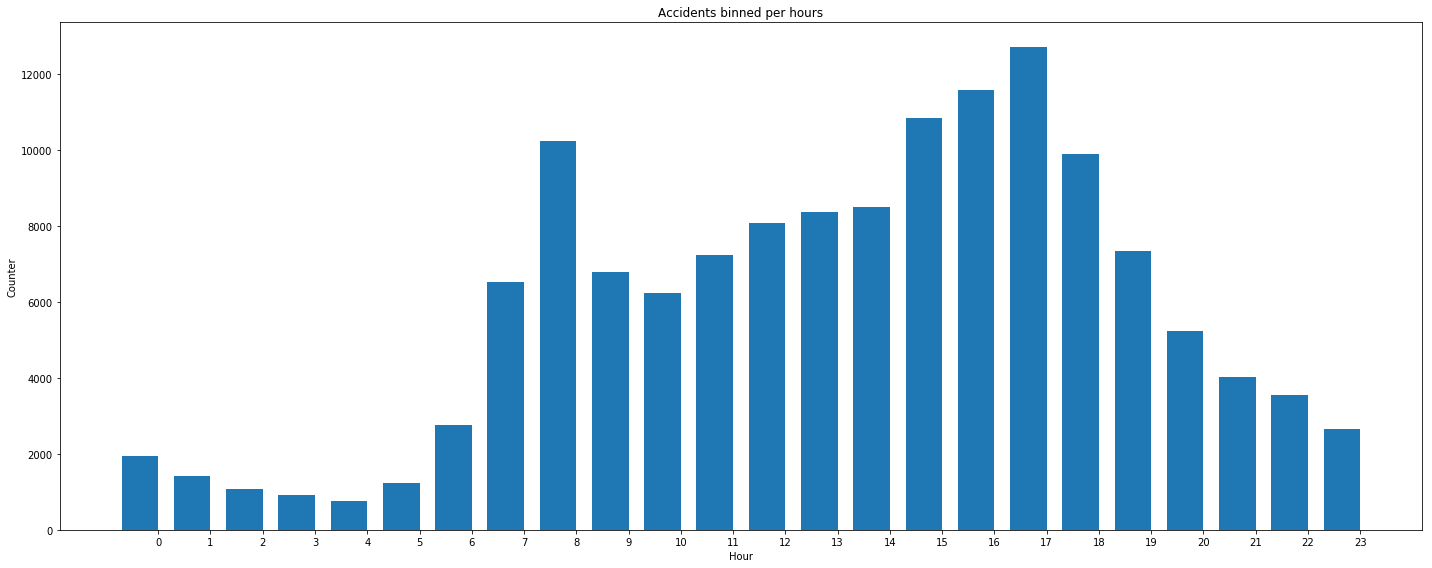

In [2]:
import numpy as np
import random
from __future__ import division
from matplotlib import pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline  

hours = np.arange(0,24)
hourly_accidents_counter = dict((hour,0) for hour in hours)

for accident in data.values():
    if accident["Time"] != "":
        hour = int( accident["Time"].split(":")[0] )
        hourly_accidents_counter[hour] += 1
        
# Generate the plot
width = 0.7
indices = hours + 0.5
plt.figure(figsize=(20,8))
labels = hourly_accidents_counter.keys()

plt.bar(indices, hourly_accidents_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='horizontal')
plt.title("Accidents binned per hours")
plt.xlabel('Hour')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()

# Accidents per month

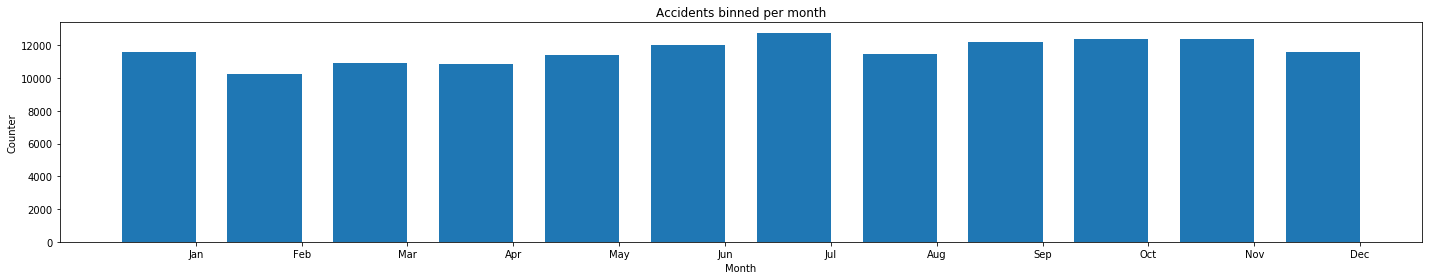

In [3]:
import numpy as np
import random
from __future__ import division
from matplotlib import pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline  

months = np.arange(1,13)
monthly_accidents_counter = dict((month,0) for month in months)

for accident in data.values():
    if accident["Date"] != "":
        month = int( accident["Date"].split("/")[-2])
        monthly_accidents_counter[month] += 1
        
# Generate the plot
width = 0.7
indices = months + 0.5
plt.figure(figsize=(20,4))
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.bar(indices, monthly_accidents_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='horizontal')
plt.title("Accidents binned per month")
plt.xlabel('Month')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()

# Accidents per sex

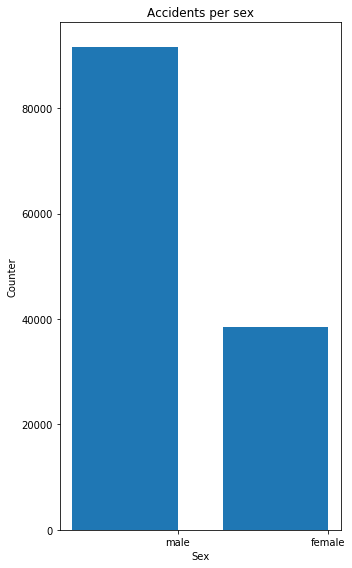

In [4]:
import numpy as np
import random
from __future__ import division
from matplotlib import pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline  

sexes = np.arange(1,3)
sex_accidents_counter = dict((sex,0) for sex in sexes)

for accident in data.values():
    if accident.has_key('Sex_of_Driver'):
        sex = int(accident['Sex_of_Driver'])
        if sex in [1,2]:
            sex_accidents_counter[sex] += 1
        
# Generate the plot
width = 0.7
indices = sexes + 0.5
plt.figure(figsize=(5,8))
labels = ['male','female']

plt.bar(indices, sex_accidents_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='horizontal')
plt.title("Accidents per sex")
plt.xlabel('Sex')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()

# Accidents per age (binned)

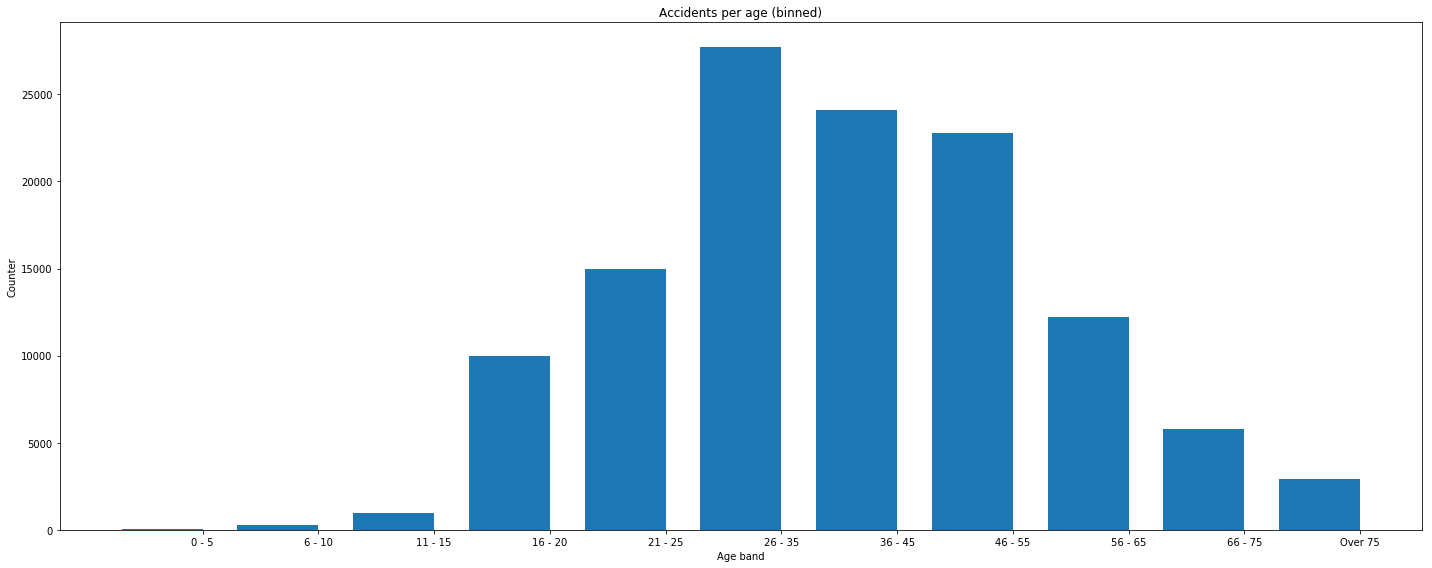

In [5]:
import numpy as np
import random
from __future__ import division
from matplotlib import pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline  

labels = [
        "0 - 5",
        "6 - 10",
        "11 - 15",
        "16 - 20",
        "21 - 25",
        "26 - 35",
        "36 - 45",
        "46 - 55",
        "56 - 65",
        "66 - 75",
        "Over 75"]

bins = np.arange(1,(len(labels)+1))
age_accidents_counter = dict((group,0) for group in bins)

for accident in data.values():
    if accident.has_key('Age_Band_of_Driver'):
        age = int(accident['Age_Band_of_Driver'])
        if age != -1:
            age_accidents_counter[age] += 1
        
# Generate the plot
width = 0.7
indices = bins + 0.5
plt.figure(figsize=(20,8))

plt.bar(indices, age_accidents_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='horizontal')
plt.title("Accidents per age (binned)")
plt.xlabel('Age band')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()



# Data preparation



Accidents grouped per hour and then using 400x341 grid, assign each acciednt to nearest grid point
This way each grid point has some weight associated with number of accidents occuring in its proximity - generates pretty graph

In [8]:
import numpy as np
import random
from __future__ import division
from sklearn.neighbors import KNeighborsClassifier

hours = np.arange(0,24)
data_transformed = []

latitudes  = [float(entry["Latitude"])  for entry in data.values()]
longitudes = [float(entry["Longitude"]) for entry in data.values()]

max_lat = max(latitudes)
min_lat = min(latitudes)
max_lon = max(longitudes)
min_lon = min(longitudes)

n_lat = 400
bins_lat = np.linspace(min_lat, max_lat, n_lat)
dist = bins_lat[1] - bins_lat[0]
bins_lon = np.arange(min_lon, max_lon, dist)
loc_counts = dict((hour,{}) for hour in hours)

for accident in data.values():
    if accident["Time"] != "":
        hour = int(accident["Time"].split(":")[0])
        latitude = min(bins_lat, key=lambda x:abs(x-float(accident["Latitude"])))
        longitude = min(bins_lon, key=lambda x:abs(x-float(accident["Longitude"])))
        
        if loc_counts[hour].has_key((latitude, longitude)):
            loc_counts[hour][(latitude, longitude)] += 1
        else:
            loc_counts[hour][(latitude, longitude)] = 1

matrix = []  
for hour,vals in loc_counts.iteritems():
    for loc, count in vals.iteritems():
        matrix.append([hour, loc[0], loc[1], count])

matrix = np.array(matrix)

with open('../docs/data/accidents_loc_time_400.csv', 'wb') as f:
  f.write("hour,lat,lon,count\n")
  np.savetxt(f, matrix, delimiter=",", fmt='%2d, %1.10f, %1.10f, %d')
    
print "Done"

Done


# Load population data and calculate true statistics

In [2]:
from csv import reader
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline  

data_drivers = {}
dataset_path = '../data/2015/'

missing = 0
# Load drivers.csv
i = 0
with open(dataset_path+'drivers.csv', 'rb') as csvfile:
    for line in reader(csvfile, delimiter=','):
        if(i == 0):
            pass
        else:
            age,_,_,_,_,_,_,licenses,licenses_male,licenses_female = line
            data_drivers[int(age)] = {'licenses':int(licenses),'licenses_male':int(licenses_male),'licenses_female':int(licenses_female)}
        i+=1


drivers_male = sum(data_drivers[i]['licenses_male'] for i in range(17,106))
drivers_female = sum(data_drivers[i]['licenses_female'] for i in range(17,106))
print "Number of drivers: ", drivers_male+drivers_female
print "Number of male drivers: ", drivers_male
print "Number of female drivers: ", drivers_female

Number of drivers:  45617349
Number of male drivers:  24168223
Number of female drivers:  21449126


# Normalized accidents per sex

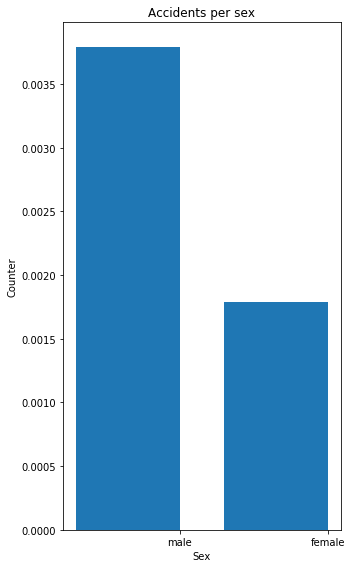

In [3]:
import numpy as np
import random
from __future__ import division
from matplotlib import pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline  

sexes = np.arange(1,3)
sex_accidents_counter = dict((sex,0) for sex in sexes)

for accident in data.values():
    if accident.has_key('Sex_of_Driver'):
        sex = int(accident['Sex_of_Driver'])
        if sex in [1,2]:
            sex_accidents_counter[sex] += 1
        
sex_accidents_counter[1] = sex_accidents_counter[1] / drivers_male
sex_accidents_counter[2] = sex_accidents_counter[2] / drivers_female

# Generate the plot
width = 0.7
indices = sexes + 0.5
plt.figure(figsize=(5,8))
labels = ['male','female']

plt.bar(indices, sex_accidents_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='horizontal')
plt.title("Accidents per sex")
plt.xlabel('Sex')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()

# Drivers per age

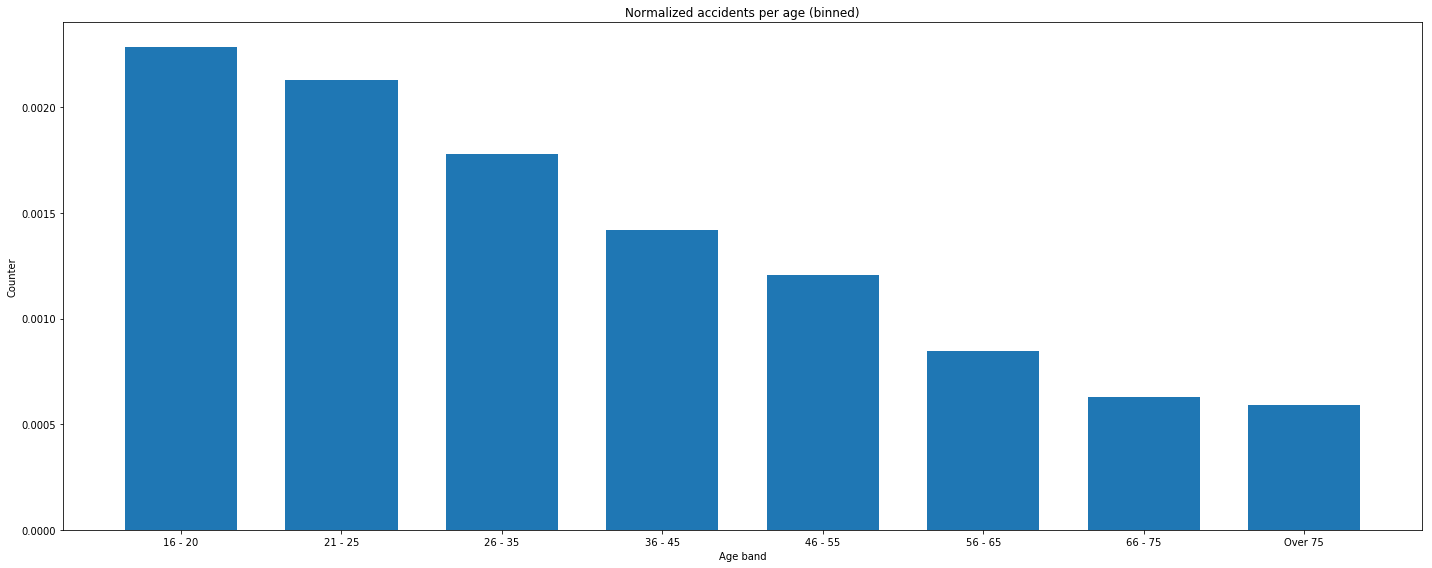

In [4]:
data_drivers_age = {}

# Bins 
# "0 - 15",
# "16 - 20",
# "21 - 25",
# "26 - 35",
# "36 - 45",
# "46 - 55",
# "56 - 65",
# "66 - 75",
# "Over 75"]

for age,vals in data_drivers.iteritems():
    if age < 16:
        age_bin = -1
    elif age > 15 and age < 21:
        age_bin = 4
    elif age > 20 and age < 26:
        age_bin = 5
    elif age > 25 and age < 36:
        age_bin = 6
    elif age > 35 and age < 46:
        age_bin = 7
    elif age > 45 and age < 56:
        age_bin = 8
    elif age > 55 and age < 66:
        age_bin = 9    
    elif age > 65 and age < 75:
        age_bin = 10
    else:
        age_bin = 11
        
    if data_drivers_age.has_key(age_bin):
        data_drivers_age[age_bin] += vals['licenses']
    else:
        data_drivers_age[age_bin] = vals['licenses']


labels = [
        "0 - 5",
        "6 - 10",
        "11 - 15",
        "16 - 20",
        "21 - 25",
        "26 - 35",
        "36 - 45",
        "46 - 55",
        "56 - 65",
        "66 - 75",
        "Over 75"]

bins = np.arange(1,(len(labels)+1))
age_accidents_counter = dict((group,0) for group in bins)

for accident in data.values():
    if accident.has_key('Age_Band_of_Driver'):
        age = int(accident['Age_Band_of_Driver'])
        if age != -1:
            age_accidents_counter[age] += 1
        
normalized_accidents_age = {}
for i in age_accidents_counter.keys():
    if data_drivers_age.has_key(i):
        normalized_accidents_age[i] = age_accidents_counter[i] / data_drivers_age[i]
        
bins = np.arange(1,(len(normalized_accidents_age.keys())+1)) 
labels = np.array(labels)[np.array(normalized_accidents_age.keys())-1]
# Generate the plot
width = 0.7
indices = bins 
plt.figure(figsize=(20,8))

plt.bar(indices, normalized_accidents_age.values(), width)
plt.xticks(indices, labels, rotation='horizontal')
plt.title("Normalized accidents per age (binned)")
plt.xlabel('Age band')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()
        

So this plot is completely different than non-normalized version

# So who is statistically the most dangerous driver?

# What cars should you watch out for?

# Which brand produces the safest cars?

# Given the weather, light conditions, day of the week and the time predict the number of the accidents and their severity

# Do the person profiling (cluster and assign to low / high risk group)

In [10]:
# from sklearn.cluster import KMeans

# attrs = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Age_of_Vehicle']

# X = {}

# for key,val in data.iteritems():
#     if attrs[0] in val.keys():
#         age = int(val[attrs[0]])
#     if attrs[1] in val.keys():
#         sex = int(val[attrs[1]])
#     if attrs[2] in val.keys():
#         v_age = int(val[attrs[2]])
        
#     if v_age == -1:
#         pass
#     elif v_age <= 5:
#         v_age = 1
#     elif v_age <=10:
#         v_age = 2
#     elif v_age <=15:
#         v_age = 3
#     elif v_age <=20:
#         v_age = 4
#     else:
#         v_age = 5
        
#     if age != -1 and sex not in [-1,3] and v_age != -1:
#         X[key] = [age, sex, v_age]
        
# print 'Done'

# kmeans = KMeans(n_clusters=50, random_state=0, n_jobs=-1)
# kmeans.fit(X.values())
# kmeans.labels_
# kmeans.cluster_centers_

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC as SVC
from sklearn.linear_model import Lasso as Lasso
from sklearn.model_selection import GridSearchCV as GridSearchCV
import random

attrs = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity']
capacities = [500,1000,1200,1500,1800,2000,2200,2500,2700,3000,3500]    

X = {}
Y = {}

# v_age_av = []
# for key,val in data.iteritems():
#     if val.has_key(attrs[2]) and int(val[attrs[2]]) != -1:
#         v_age_av.append(int(val[attrs[2]]))
# v_age_av = sum(v_age_av) / len(v_age_av)

for key,val in data.iteritems():
    if attrs[0] in val.keys():
        age = int(val[attrs[0]])
    if attrs[1] in val.keys():
        sex = int(val[attrs[1]])
    if attrs[2] in val.keys():
        v_age = int(val[attrs[2]])
    if attrs[3] in val.keys():
        capacity = int(val[attrs[3]])    
        
    if v_age == -1:
        pass
    elif v_age <= 5:
        v_age = 1
    elif v_age <=10:
        v_age = 2
    elif v_age <=15:
        v_age = 3
    elif v_age <=20:
        v_age = 4
    else:
        v_age = 5
        
        
    if capacity == -1:
        pass
    else:
        for i in range(len(capacities)):
            c = capacities[i]
            
            if capacity <= c:
                capacity = i+1
                break
                
        if capacity > capacities[-1]:
            capacity = len(capacities)+1
            
    if age not in [-1,1,2,3] and sex not in [-1,3] and v_age != -1 and capacity != -1:
        X[key] = [age, sex, v_age, capacity]
        Y[key] = normalized_accidents_age[age] * sex_accidents_counter[sex] / (4-int(val['Accident_Severity']))  / int(val['Number_of_Vehicles']) / int(val['Number_of_Casualties']) * max(capacity,6)  

Y_max = max(Y.values())
for key in Y.keys():
    Y[key] = min(int(round(Y[key] / Y_max,3)*100) + 20,100)

Y_min = min(Y.values())

model = DecisionTreeClassifier(max_features=4, splitter='random')
model.fit(X.values(), Y.values())
    
# Grid Search with CV
# model = SVC()
# parameters = {'C':np.logspace(-2,3,6)}
# folds = 4

# print 'Performing grid search...'
# clf = GridSearchCV(SVM, parameters, verbose=2, cv=folds, n_jobs=-1)
# clf.fit(X.values(), Y.values())

# print 'Building final model'
# model = SVC(clf.best_estimator_.C)
# model.fit(X.values(), Y.values())

# model = SVC(10, verbose=3)
# model.fit(X.values(), Y.values())

# model = Lasso(0.5)
# model.fit(X.values(), Y.values())

print 'Done'

ages = range(4, 12)
sexes = range(1, 3)
vehicle_ages = range(1,6)
capacities = range(1,len(capacities))

X = []

for age in ages:
    for sex in sexes:
        for v_age in vehicle_ages:
            for capacity in capacities:
                X.append([age,sex,v_age,capacity])
            
Y = model.predict(X)    

matrix = np.empty((len(X),5))
matrix[:,:4] = np.array(X)
matrix[:,4] = np.array(Y).T

with open('../docs/data/gauge.csv', 'wb') as f:
  f.write("age_band,sex,vehicle_age,engine_capacity,score\n")
  np.savetxt(f, matrix, delimiter=",", fmt='%2d, %1d, %2d, %2d, %1.10f')
    
print "Done"

Done
Done


In [73]:
ages = range(4, 12)
sexes = range(1, 3)
vehicle_ages = range(1,6)
capacities = range(1,len(capacities))

X = []

for age in ages:
    for sex in sexes:
        for v_age in vehicle_ages:
            for capacity in capacities:
                X.append([age,sex,v_age,capacity])
            
Y = model.predict(X)    

matrix = np.empty((len(X),5))
matrix[:,:4] = np.array(X)
matrix[:,4] = np.array(Y).T

with open('../docs/data/gauge.csv', 'wb') as f:
  f.write("age_band,sex,vehicle_age,engine_capacity,score\n")
  np.savetxt(f, matrix, delimiter=",", fmt='%2d, %1d, %2d, %2d, %1.10f')
    
print "Done"

Done
